In [35]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [36]:
df = pd.read_csv(r'/content/drive/MyDrive/Gym tracker/Data/squat_accel_self_data/squats_phone.csv')

In [37]:
df.head()

,time,ax,ay,az,a_mag
0,0.053691,0.597009,5.878567,7.936993,9.894939
1,0.056230,0.697508,5.825925,8.114061,10.013287
2,0.058769,0.783649,5.806782,8.324630,10.179994
3,0.061308,0.798006,5.768497,8.434700,10.249709
4,0.063844,0.836291,5.715855,8.525627,10.298383


Text(0.5, 1.0, 'Magnitude of Acceleration with Time.')

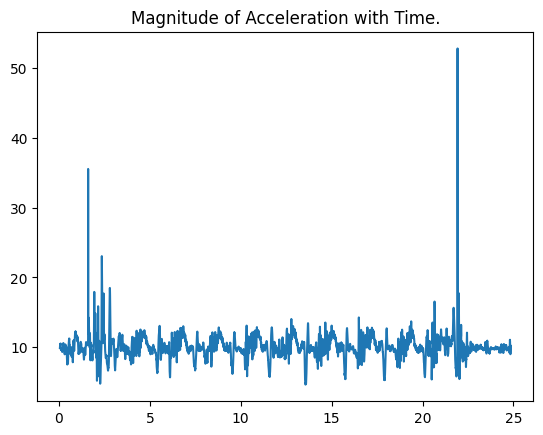

In [38]:
plt.plot(df.time, df.a_mag)
plt.title('Magnitude of Acceleration with Time.') # via acceleromemter on the Oneplus 11R 5G

In [39]:
time = df['time'].values
mask = (time>= 3) & (time <= time[-1] -2) # removes first and last second
df = df[mask].reset_index(drop=True)

Text(0.5, 1.0, 'Magnitude of Acceleration with Time with first three seconds & last two seconds removed')

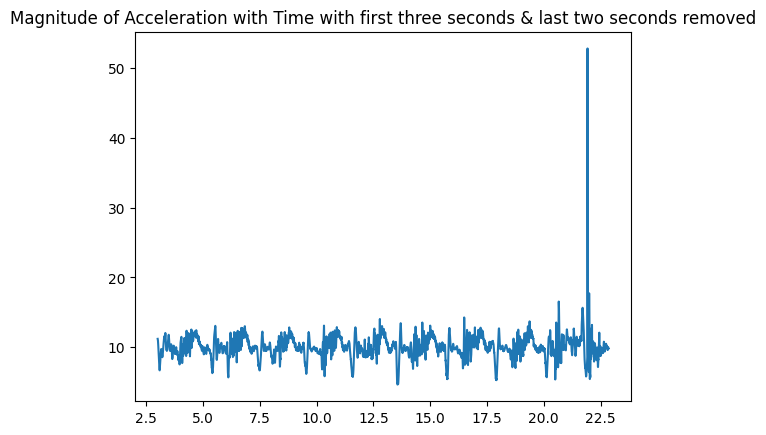

In [40]:
plt.plot(df.time, df.a_mag)
plt.title('Magnitude of Acceleration with Time with first three seconds & last two seconds removed')

In [41]:
window = 25
a_smooth = np.convolve(df.a_mag, np.ones(window)/window, mode = 'same')

Text(0.5, 1.0, 'Magnitude of Smoothened Acceleration with Time.')

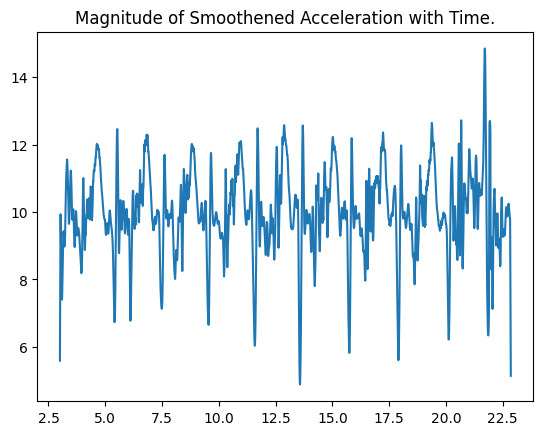

In [42]:
plt.plot(df.time, a_smooth)
plt.title('Magnitude of Smoothened Acceleration with Time.')

In [43]:
from scipy.signal import find_peaks
valleys,_ = find_peaks(-a_smooth, distance = 70, height = -(7.0), prominence = 5.4) # peaks to valleys with -ve
print(valleys)
print(f"number of reps = {len(valleys)}")

[1223 2578 3380 4163 5019 5870 6743 7428]
number of reps = 8


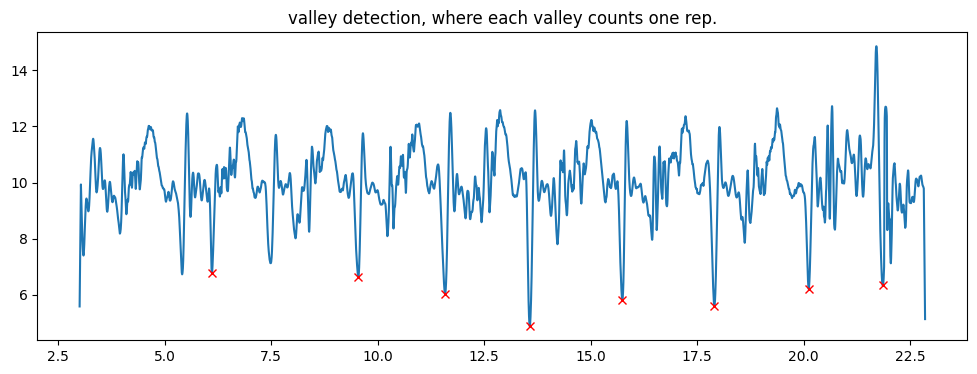

In [44]:
plt.figure(figsize=(12,4))
plt.plot(df.time, a_smooth)
plt.plot(df.time[valleys], a_smooth[valleys], 'rx')
plt.title("valley detection, where each valley counts one rep.")
plt.show()

In [45]:
#next -> finding rep duration then depth
#then ML for rep quality, smoothness, fatigue

In [46]:
print(valleys)
time_stamp = df.time[valleys]
time_intervals = []
for i in range(len(time_stamp)):
  if i == 0:
    time_intervals.append(time_stamp.iloc[i])
  else:
    time_intervals.append(time_stamp.iloc[i] - time_stamp.iloc[i-1])
print(time_intervals)

[1223 2578 3380 4163 5019 5870 6743 7428]
[np.float64(6.106914328), np.float64(3.440571822999999), np.float64(2.036082499000001), np.float64(1.9881214099999998), np.float64(2.1733987500000005), np.float64(2.1608943699999994), np.float64(2.2167346399999985), np.float64(1.7390340600000016)]


In [47]:
print(df.time[valleys])

1223     6.106914
2578     9.547486
3380    11.583569
4163    13.571690
5019    15.745089
5870    17.905983
6743    20.122718
7428    21.861752
Name: time, dtype: float64


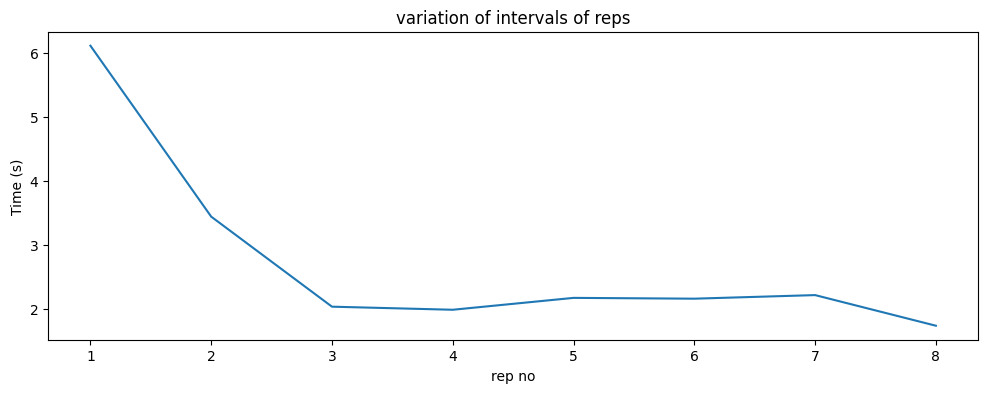

In [48]:
plt.figure(figsize = (12,4))
plt.plot(range(1,len(time_intervals)+1), time_intervals)
plt.title('variation of intervals of reps')
plt.ylabel('Time (s)')
plt.xlabel('rep no')
plt.show()


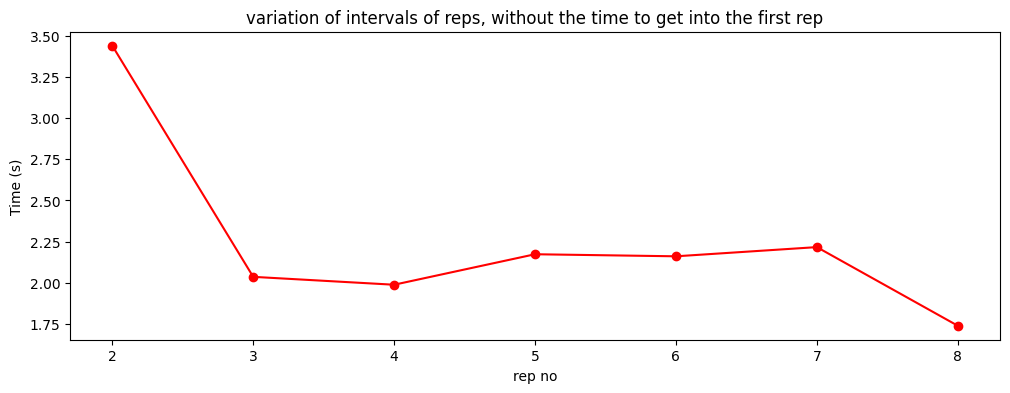

In [49]:
plt.figure(figsize = (12,4))
plt.plot(range(2,(len(time_intervals)+1)), time_intervals[1:], marker = 'o', color = 'r')
plt.title('variation of intervals of reps, without the time to get into the first rep')
plt.ylabel('Time (s)')
plt.xlabel('rep no')
plt.show()

In [50]:
time_intervals_list = list(map(lambda x: float(x), time_intervals)) #converting values to python list type
print(time_intervals_list)

[6.106914328, 3.440571822999999, 2.036082499000001, 1.9881214099999998, 2.1733987500000005, 2.1608943699999994, 2.2167346399999985, 1.7390340600000016]


In [51]:
# depth calculation of each rep

[1223 2578 3380 4163 5019 5870 6743 7428]


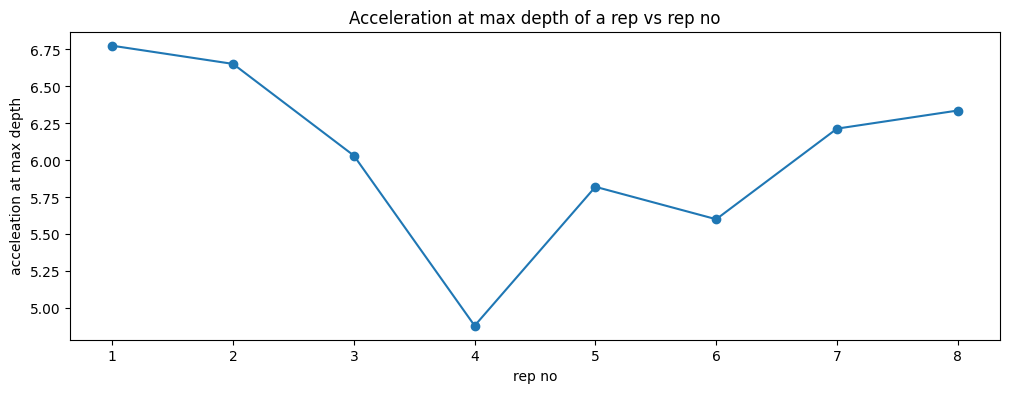

In [52]:
#graph of acceleation vs rep no
print(valleys)
rep_depth = a_smooth[valleys]
plt.figure(figsize = (12,4))
plt.plot(range(1,len(rep_depth)+1), rep_depth, marker = 'o')
plt.title("Acceleration at max depth of a rep vs rep no")
plt.xlabel('rep no')
plt.ylabel("acceleation at max depth")
plt.show()

In [53]:
df.head()

,time,ax,ay,az,a_mag
0,3.001655,1.616950,-10.641480,-3.129214,11.209265
1,3.004200,1.501496,-10.622338,-3.114857,11.170985
2,3.006745,1.444068,-10.579268,-3.047858,11.103858
3,3.009290,1.338784,-10.564910,-3.033501,11.073021
4,3.011835,1.267000,-10.560124,-3.043072,11.062631


In [54]:
print(time_intervals_list)
print(rep_depth)
rep_no = list(range(1, len(rep_depth) +1))
print(rep_no)
rep_time = time_stamp # for easier intuition
print(len(time_intervals_list))

[6.106914328, 3.440571822999999, 2.036082499000001, 1.9881214099999998, 2.1733987500000005, 2.1608943699999994, 2.2167346399999985, 1.7390340600000016]
[6.77512115 6.65216447 6.03253762 4.88263708 5.82160597 5.60233995
 6.21473287 6.33712227]
[1, 2, 3, 4, 5, 6, 7, 8]
8


In [55]:
#finding peaks of a_smooth
peaks,_ = find_peaks(a_smooth, distance = 100, height = (7.0), prominence = 5.4)
print(peaks)
print(f"number of peaks = {len(peaks)}")
print(len(peaks), len(valleys))

[ 994 1503 3139 3889 4212 5603 6450 7369]
number of peaks = 8
8 8


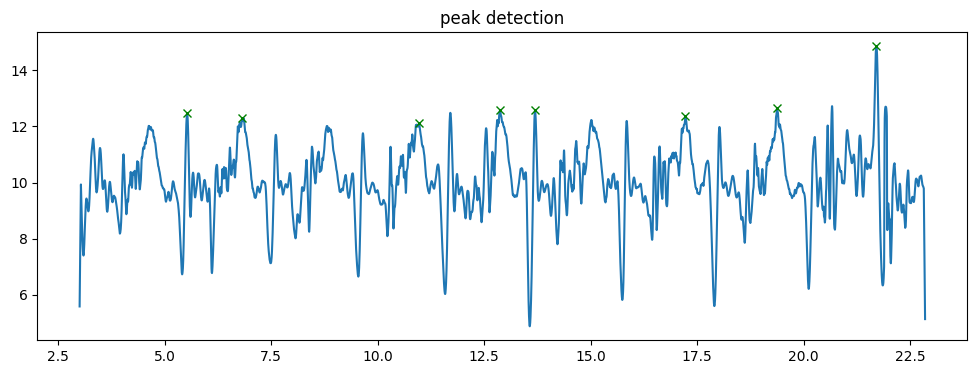

In [56]:
plt.figure(figsize=(12,4))
plt.plot(df.time, a_smooth)
plt.plot(df.time[peaks], a_smooth[peaks], 'gx')
plt.title("peak detection")
plt.show()

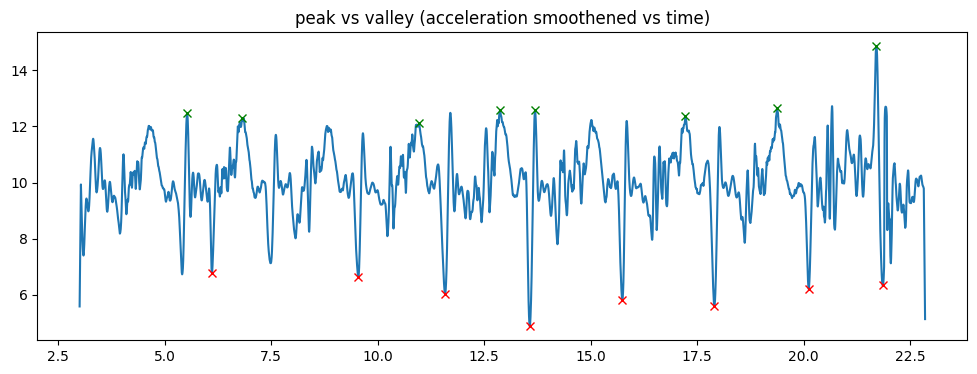

In [57]:
plt.figure(figsize=(12,4))
plt.plot(df.time, a_smooth)
plt.plot(df.time[valleys], a_smooth[valleys], 'rx')
plt.plot(df.time[peaks], a_smooth[peaks], 'gx')
plt.title("peak vs valley (acceleration smoothened vs time)")
plt.show()

In [58]:
valley_a = a_smooth[valleys]
peak_a = a_smooth[peaks]

range_a = []

for i in range(len(valley_a) -1): # last valley corresponds to no peak
    range_a.append(peak_a[i+1] - valley_a[i]) # peak - valley before | valleys are when the user is decelerating towards the ground and peaks are when user is shooting up

range_a = list(map(float, range_a))
print(range_a)

[5.5190160171599985, 5.450337264679999, 6.5443850678399995, 7.685922794520001, 6.538354492480001, 7.040404338879999, 8.636095690480001]


In [59]:
set_df = pd.DataFrame({
    # metadata
    "set_id": 1,
    "set_size": len(rep_no),
    "exercise": "squat",
    "age": 16,
    "date": pd.to_datetime('20/2/2026', dayfirst = True),
    # rep features
    "rep_in_set": rep_no[1:-1],                  # 2 to 7
    "rep_time": rep_time[1:-1],                  # times of reps 2 to 8
    "rep_interval": time_intervals_list[1:-1],   # true intervals only (2-7)
    "rep_depth": rep_depth[1:-1],                # depths of reps 2 to 7
    "range_a":range_a[1:]                        # peak - valley before difference gives 2 to 7
}).reset_index(drop = True)

# removed last rep to ensure range  corresponds to others

set_df.head(6)

# rows = reps, columns = rep features

,set_id,set_size,exercise,age,date,rep_in_set,rep_time,rep_interval,rep_depth,range_a
0,1,8,squat,16,2026-02-20,2,9.547486,3.440572,6.652164,5.450337
1,1,8,squat,16,2026-02-20,3,11.583569,2.036082,6.032538,6.544385
2,1,8,squat,16,2026-02-20,4,13.571690,1.988121,4.882637,7.685923
3,1,8,squat,16,2026-02-20,5,15.745089,2.173399,5.821606,6.538354
4,1,8,squat,16,2026-02-20,6,17.905983,2.160894,5.602340,7.040404
5,1,8,squat,16,2026-02-20,7,20.122718,2.216735,6.214733,8.636096


In [60]:
#fatigue score

In [66]:
t_min = set_df['rep_interval'].min()
t_max = set_df['rep_interval'].max()
norm_time = []
for i in time_intervals_list[1:-1]:
  norm_time.append((i-t_min)/(t_max-t_min))
print(norm_time)

[1.0, 0.03302080991593968, 0.0, 0.12756190389819583, 0.1189527425195477, 0.15739830286378176]


In [67]:
r_min = set_df['range_a'].min()
r_max = set_df['range_a'].max()
norm_range = []
for i in range_a[1:]:
  norm_range.append((i-r_min)/(r_max-r_min))
print(norm_range)

[0.0, 0.34341831894716407, 0.7017435822299066, 0.34152533945720653, 0.49911727810959344, 1.0]


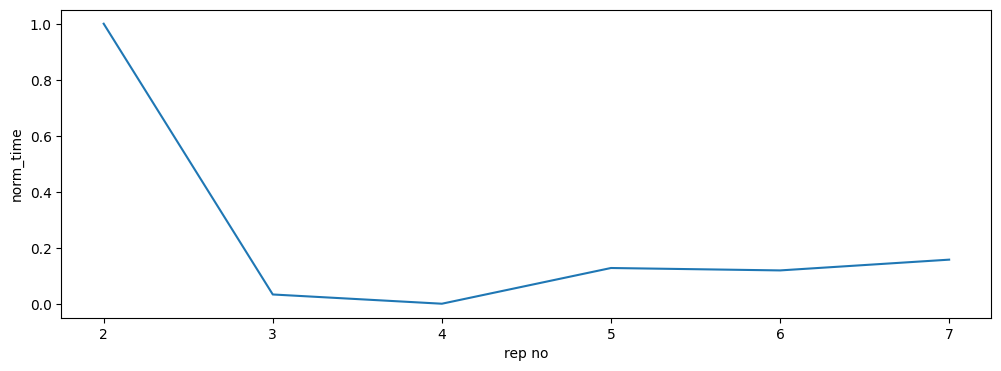

In [75]:
plt.figure(figsize = (12,4))
plt.plot(set_df['rep_in_set'], norm_time)
plt.ylabel('norm_time')
plt.xlabel('rep no')
plt.show()

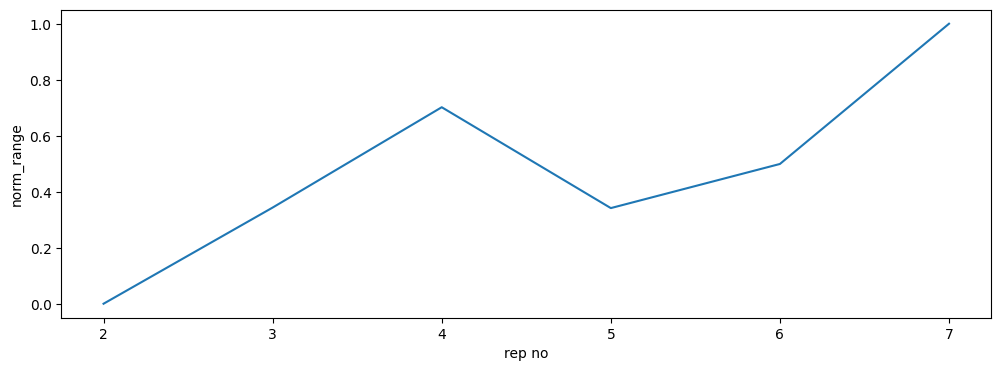

In [76]:
plt.figure(figsize = (12,4))
plt.plot(set_df['rep_in_set'], norm_range)
plt.ylabel('norm_range')
plt.xlabel('rep no')
plt.show()